In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
np.random.seed(42)
plt.style.use("fivethirtyeight")

# 0. Proszę zaimportować dane z pliku "titanic.csv"

In [3]:
data = pd.read_csv("titanic.csv", index_col="passenger_id")

In [4]:
print(f"In total: {data.shape}")
data.head(5).append(data.tail(5))

In total: (1309, 11)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passenger_id,,,,,,,,,,,
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
1305,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C
1306,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1307,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C
1308,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C


# 1. Proszę sprawdzić strukturę danych w zależności od płci, klasy podróży i portu zaokrętowania. Dodatkowo proszę narysować wykresy słupkowe i/lub kołowe dla tych zmiennych.

In [5]:
"""Function to plot pie chart."""


def plot_pie_chart(data_frame, feature_value, title):
    dict_ = data_frame[feature_value].value_counts().to_dict()

    fig = plt.figure(figsize=(13, 7))
    ax = fig.add_subplot()

    ax.pie(
        dict_.values(),
        labels=dict_.keys(),
        autopct="%1.1f%%",
        textprops={"fontsize": 10, "color": "black",},
    )
    ax.set_title(title)

    ax.legend(
        loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10,
    )


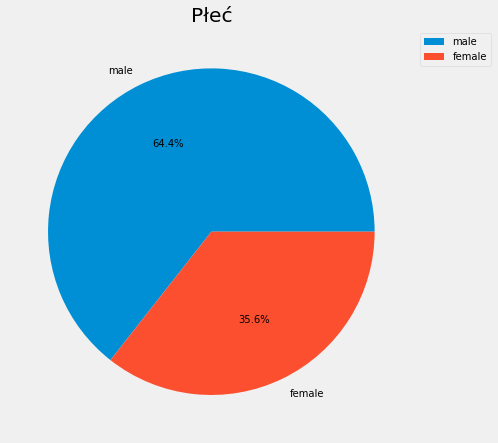

In [6]:
plot_pie_chart(data, feature_value="sex", title="Płeć");

In [7]:
data.groupby(["sex"], as_index=False).mean()

,sex,pclass,survived,age,sibsp,parch,fare
0,female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097
1,male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601


In [8]:
data[["sex", "survived"]].groupby(["sex"], as_index=False).mean().sort_values(
    by="survived", ascending=False
)

,sex,survived
0,female,0.727468
1,male,0.190985


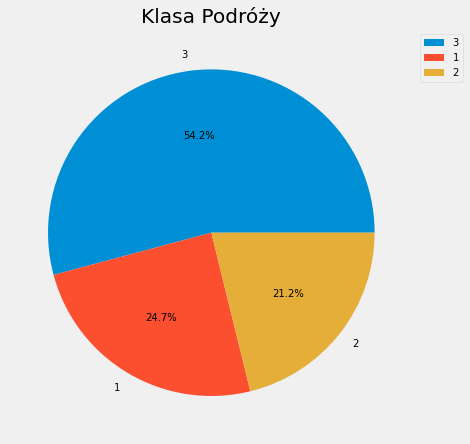

In [9]:
plot_pie_chart(data, feature_value="pclass", title="Klasa Podróży");

In [10]:
data.groupby(["pclass"], as_index=False).mean()

,pclass,survived,age,sibsp,parch,fare
0,1,0.619195,39.159918,0.436533,0.365325,87.508992
1,2,0.429603,29.506705,0.393502,0.368231,21.179196
2,3,0.255289,24.816367,0.568406,0.400564,13.302889


In [11]:
data[["pclass", "survived"]].groupby(["pclass"], as_index=False).mean().sort_values(
    by="survived", ascending=False
)

,pclass,survived
0,1,0.619195
1,2,0.429603
2,3,0.255289


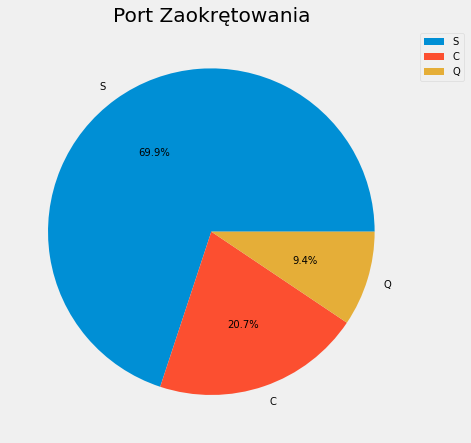

In [12]:
plot_pie_chart(data, feature_value="embarked", title="Port Zaokrętowania");

In [13]:
data.groupby(["embarked"], as_index=False).mean()

,embarked,pclass,survived,age,sibsp,parch,fare
0,C,1.851852,0.555556,32.332154,0.400000,0.370370,62.336267
1,Q,2.894309,0.357724,28.630000,0.341463,0.113821,12.409012
2,S,2.347921,0.332604,29.245205,0.550328,0.426696,27.418824


In [14]:
data[["embarked", "survived"]].groupby(["embarked"], as_index=False).mean().sort_values(
    by="survived", ascending=False
)

,embarked,survived
0,C,0.555556
1,Q,0.357724
2,S,0.332604


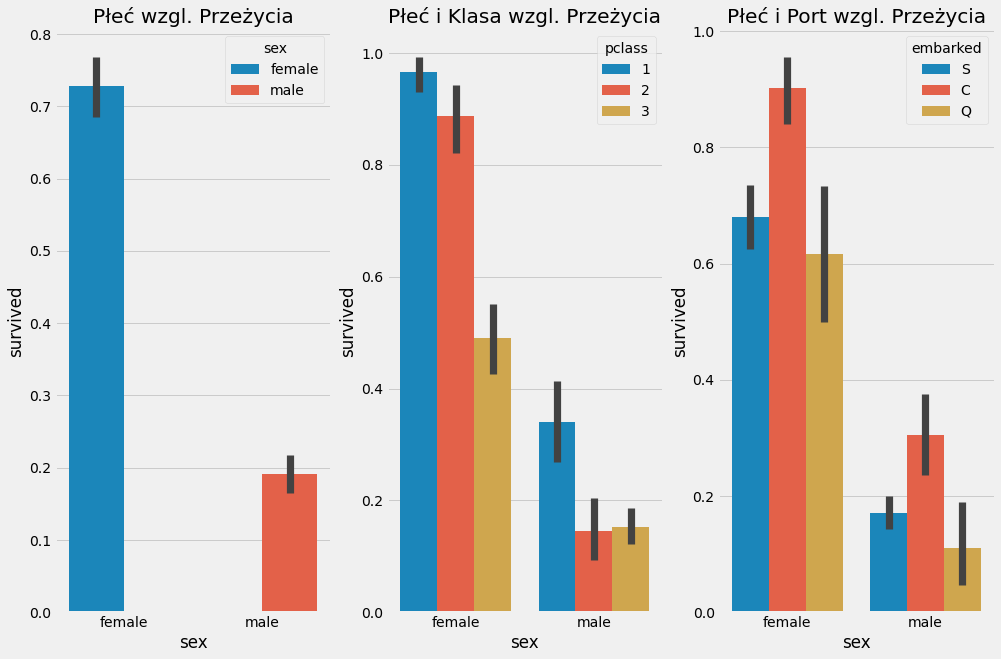

In [15]:
_, qaxis = plt.subplots(1, 3, figsize=(15, 10))

sns.barplot(x="sex", y="survived", hue="sex", data=data, ax=qaxis[0])
qaxis[0].set_title("Płeć wzgl. Przeżycia")

sns.barplot(x="sex", y="survived", hue="pclass", data=data, ax=qaxis[1])
qaxis[1].set_title("Płeć i Klasa wzgl. Przeżycia")

sns.barplot(x="sex", y="survived", hue="embarked", data=data, ax=qaxis[2])
qaxis[2].set_title("Płeć i Port wzgl. Przeżycia");

# 2. Proszę sprawdzić częstości, także procentowe, dla zmiennej survived.

In [16]:
data["survived"].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [17]:
data["survived"].value_counts(normalize=True)

0    0.618029
1    0.381971
Name: survived, dtype: float64

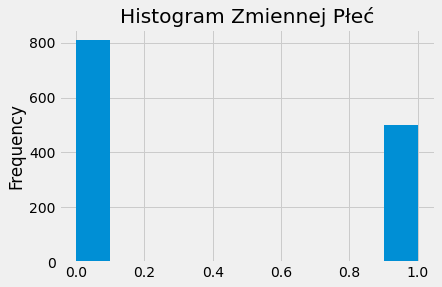

In [18]:
data["survived"].plot.hist(title="Histogram Zmiennej Płeć");

# 3. Proszę sprawdzić liczbę braków danych w poszczególnych kolumnach.

In [19]:
"""Function to calculate missing values by column."""


def missing_values_table(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values_percent = 100 * data_frame.isnull().sum() / len(data_frame)
    missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
    missing_values_table_rename_columns = missing_values_table.rename(
        columns={0: "Missing Values", 1: "Percent of Total Values"}
    )
    # Sort the table by percentage of missing descending
    missing_values_table_rename_columns = (
        missing_values_table_rename_columns[
            missing_values_table_rename_columns.iloc[:, 1] != 0
        ]
        .sort_values("Percent of Total Values", ascending=False)
        .round(1)
    )
    print(
        "Your selected dataframe has " + str(data_frame.shape[1]) + " columns.\n"
        "There are "
        + str(missing_values_table_rename_columns.shape[0])
        + " columns that have missing values."
    )
    return missing_values_table_rename_columns


In [20]:
missing_values = missing_values_table(data)

Your selected dataframe has 11 columns.
There are 4 columns that have missing values.


In [21]:
missing_values

,Missing Values,Percent of Total Values
cabin,1014,77.5
age,263,20.1
embarked,2,0.2
fare,1,0.1


# 4. Proszę wyświetlić i zinterpretować podstawowe statystyki opisowe (min, max, średnia, mediana, q1, q3) dla wieku i wielkości opłaty za bilet. Dodatkowo proszę narysować histogram dla każdej z tych zmiennych.

In [22]:
data.describe(include="float64")

,age,fare
count,1046.000000,1308.000000
mean,29.881135,33.295479
std,14.413500,51.758668
min,0.166700,0.000000
25%,21.000000,7.895800
50%,28.000000,14.454200
75%,39.000000,31.275000
max,80.000000,512.329200


Podstawowe statystyki opisowe (min, max, średnia, mediana, q1, q3) dają nam zwięzłe podsumowanie dystrybucji obserwacji. To co rzuciło mi się w oczy to wartość minimalna zmiennej fare &mdash; 0. Czy to oznacza, że niektóre bilety były rozdawane za darmo? Z drugiej strony wartość maksymalna 512 za bilet przy medianie 14 wygląda na wartość "odstającą".

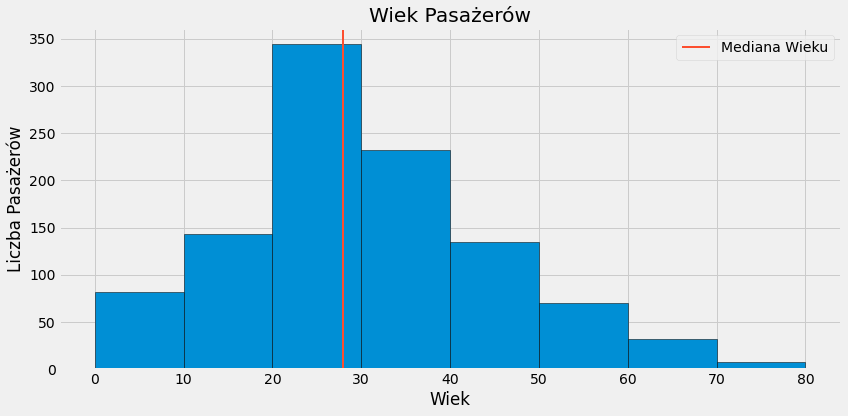

In [23]:
ages = data["age"]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.figure(figsize=(12, 6))
plt.hist(ages, bins=bins, edgecolor="black")
median_age = 28
color = "#fc4f30"
plt.axvline(median_age, color=color, label="Mediana Wieku", linewidth=2)
plt.legend()
plt.title("Wiek Pasażerów")
plt.xlabel("Wiek")
plt.ylabel("Liczba Pasażerów")
plt.tight_layout()
plt.show();

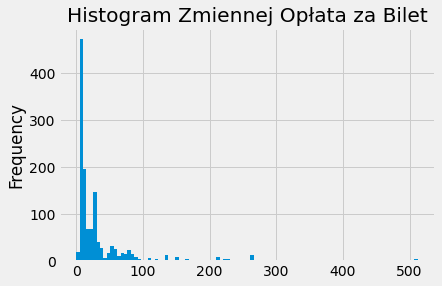

In [24]:
data["fare"].plot.hist(bins=100, title="Histogram Zmiennej Opłata za Bilet");

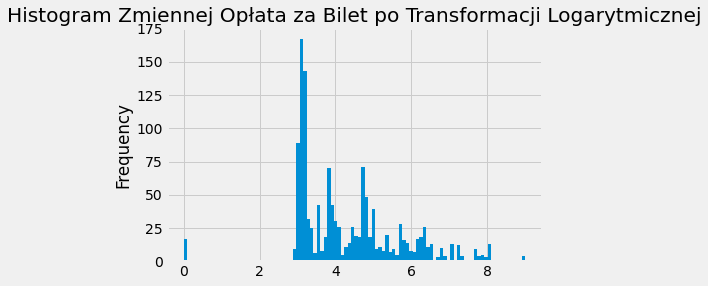

In [25]:
np.log2(data["fare"] + 1).plot.hist(
    bins=100, title="Histogram Zmiennej Opłata za Bilet po Transformacji Logarytmicznej"
);

# 5. Proszę narysować wykres rozrzutu dla opłaty za bilet i wieku oraz policzyć z zinterpretować współczynnik korelacji liniowej między nimi.

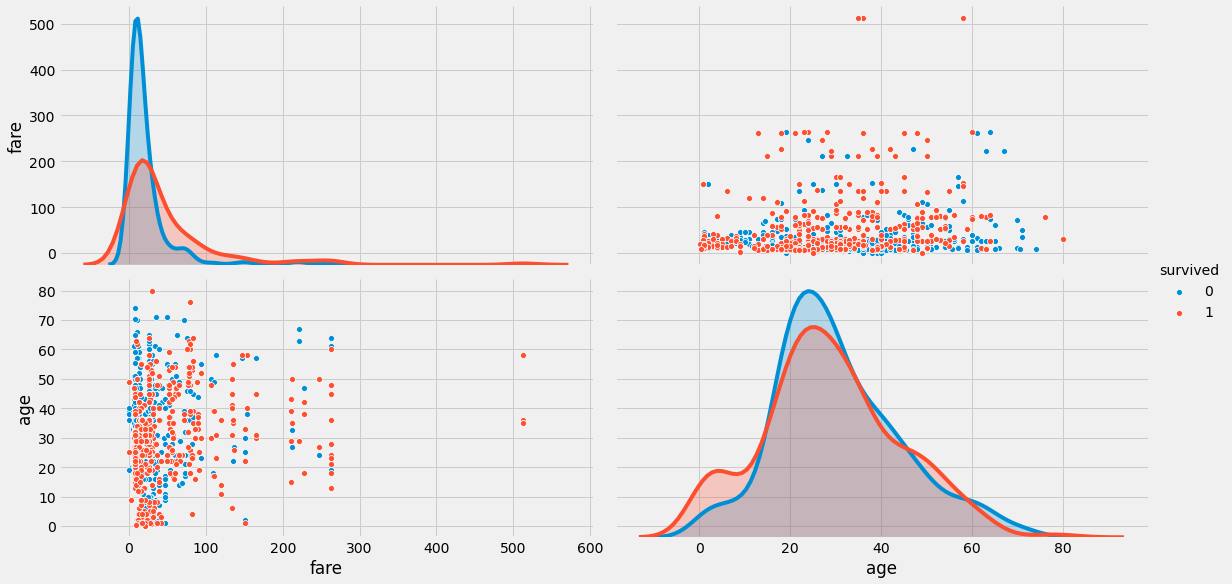

In [26]:
sns.pairplot(
    data, hue="survived", height=4, aspect=2, vars=["fare", "age"], diag_kind="kde"
);

In [27]:
print(
    f"Współczynnik Korelacji Liniowej Między Zmienną Opłata za Bilet, a Zmienną Wiek: {data.fare.corr(data.age):.2f}"
)

Współczynnik Korelacji Liniowej Między Zmienną Opłata za Bilet, a Zmienną Wiek: 0.18


Jednym ze sposobów na zrozumienie danych jest spojrzenie na korelacje pomiędzy zmiennymi. Możemy obliczyć współczynnik korelacji Pearsona pomiędzy zmiennymi używając metody `.corr`. 

Uważa się jednak, że współczynnik korelacji nie jest najlepszą z metod reprezantacji istotności zmiennych, ale daję nam pojęcie możliwych relacji pomiędzy zmiennymi.

[Generalna interpretacja wartości absolutnej współczynnika korelacji](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf):
- .00 - .19 "bardzo słaba"
- .20 - .39 "słaba"
- .40 - .59 "umiarkowana"
- .69 - .79 "silna"
- .80 - 1.0 "bardzo silna"

# 6. Proszę podzielić losowo zbiór danych na próbę uczącą i testową wg proporcji 70/30, zachowując możliwość odtworzenia podziału (ziarno losowania)

In [28]:
features_train, features_test, labels_train, labels_test = train_test_split(
    data,
    data["survived"],
    test_size=0.3,
    stratify=data["survived"],
    random_state=42,
    shuffle=True,
)

# 7. Proszę porównać strukturę zmiennej survived w obu zbiorach.

Jeżeli spojrzymy na próbę testową, możemy zauważyć jakiś schemat, który sprawi, że wybierzemy szczególny model uczenia maszynowego. Kiedy będziemy estymować ogólny błąd używając próby testowej, nasza estymacja może okazać się zbyt optymistyczna, przez to stworzymy system, który nie będzie działał tak dobrze jak oczekiwaliśmy. To jest tzw. "data snopping bias".

In [29]:
labels_train.value_counts()

0    566
1    350
Name: survived, dtype: int64

In [30]:
labels_test.value_counts()

0    243
1    150
Name: survived, dtype: int64

# 8. Braki danych w kolumnie oznaczającej port zaokrętowania proszę zastąpić wartością "S" w obu zbiorach.

# 9. Braki danych w kolumnie z wiekiem w zbiorze treningowym proszę zastąpić

a) średnią wyliczoną na podstawie całego zbioru

b) medianą wyliczoną osobno w podgrupach wg zmiennej survived

In [31]:
numeric_features = ["age", "fare", "sibsp", "parch"]
numeric_pipeline = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

categorical_features = ["embarked", "sex", "pclass"]
categorical_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="S")),
        ("onehot", OneHotEncoder()),
    ]
)

full_pipeline = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_features),
        ("cat", categorical_pipeline, categorical_features),
    ]
)

In [32]:
features_train_prepared = full_pipeline.fit_transform(features_train)

b) W powyższym pipeline wystarczy zmienić strategię SimpleImputer na "median"

# 10. Wartości średniej/median obliczonych w zadaniu 9 proszę użyć do analogicznego zastąpienia braków danych w próbie testowej

In [33]:
features_test_prepared = full_pipeline.transform(features_test)

# 11. Na zbiorze uczącym proszę oszacować model regresji logistycznej, wyjaśniający prawdopodobieństwo przeżycia katastrofy Titanica w zależności od innych sensownych zmiennych.

In [34]:
logistic_regression = LogisticRegression(random_state=669)

In [35]:
logistic_regression.fit(features_train_prepared, labels_train)

LogisticRegression(random_state=669)

# 12. Proszę ocenić jakość dopasowania modelu regresji logistycznej licząc dla próby uczącej: accuracy, sensitivity, specificity, AUCROC, F1 oraz rysując wykres krzywej ROC. Czy model jest dobrze dopasowany? Prośba o krótki komentarz.

In [36]:
# accuracy
cross_val_score(
    logistic_regression, features_train_prepared, labels_train, cv=3, scoring="accuracy"
)

array([0.76797386, 0.79016393, 0.7442623 ])

Powyżej 75% (stosunek poprawnych predykcji) na większośći cross-validation folds. Generalnie accuracy nie jest preferowaną metryką sukcesu dla klasyfikatorów, szczególnie gdy mamy do czynienia ze skrzywionymi zbiorami danych (tzn. gdy niektóre klasy są częstsze od innych).

In [37]:
labels_train_predicted = cross_val_predict(logistic_regression, features_train_prepared, labels_train, cv=3)

In [38]:
confusion_matrix_logreg = confusion_matrix(labels_train, labels_train_predicted)
confusion_matrix_logreg

array([[471,  95],
       [118, 232]])

In [39]:
# sensitivity, also called recall
recall_score(labels_train, labels_train_predicted)

0.6628571428571428

In [40]:
true_positive = confusion_matrix_logreg[1, 1]
true_negative = confusion_matrix_logreg[0, 0]
false_positive = confusion_matrix_logreg[0, 1]
false_negative = confusion_matrix_logreg[1, 0]

In [41]:
specificity = true_negative / (true_negative + false_positive)
specificity

0.8321554770318021

In [42]:
# F1, harmonic mean of precision and recall
f1_score(labels_train, labels_train_predicted)

0.6853766617429837

In [43]:
# AUCROC
roc_auc_score(labels_train, labels_train_predicted)

0.7475063099444724

In [44]:
scores = logistic_regression.decision_function(features_train_prepared)

false_positive_rate, true_positive_rate, threshold = roc_curve(labels_train, scores)

In [45]:
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")  # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (Fall-Out)", fontsize=16)
    plt.ylabel("True Positive Rate (Recall)", fontsize=16)
    plt.grid(True)

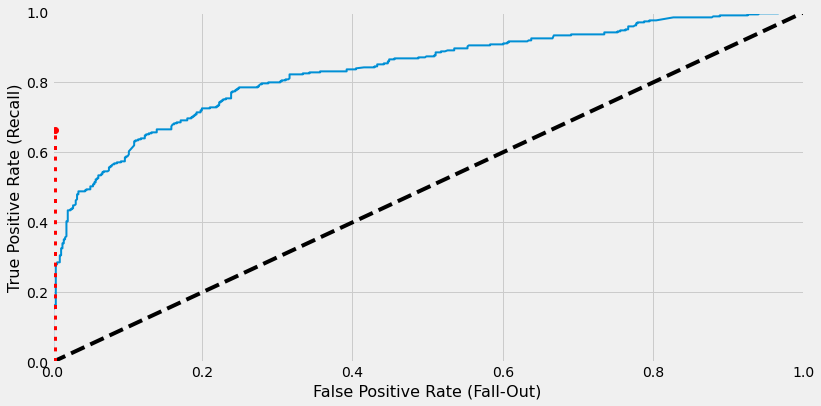

In [46]:
plt.figure(figsize=(12, 6))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.plot([4.837e-3, 4.837e-3], [0.0, 0.6628], "r:")
plt.plot([0.0, 4.837e-3], [0.6628, 0.6628], "r:")
plt.plot([4.837e-3], [0.6628], "ro")
plt.show()

Ta krzywa ROC kreśli false positive rate przeciwko true positive rate dla wszystkich możliwych progów punktowych; czerwona kropka podkreśla wybrany współczynnik (66.28% recall)

Perfekcyjny klasyfikator miałby ROC AUC równy 1, gdzie czysto losowy klasyfikator miałby ROC AUC rowne 0.5. Natomiast, powyższa krzywa ROC przejrzyście pokazuję, że klasyfikator ma możliwość poprawy (krzywa mogła by być bliżej lewego górnego rogu).

# 13. Na zbiorze uczącym proszę oszacować las losowy (z domyślnymi wartościami hiperparametrów), wyjaśniający prawdopodobieństwo przeżycia katastrofy Titanica w zależności od innych sensownych zmiennych.

In [47]:
random_forest_classifier = RandomForestClassifier(random_state=669)

In [48]:
random_forest_classifier.fit(features_train_prepared, labels_train)

RandomForestClassifier(random_state=669)

# 14. Proszę ocenić jakość dopasowania lasu losowego licząc dla próby uczącej: accuracy, sensitivity, specificity, AUCROC, F1 oraz rysując wykres krzywej ROC. Czy model jest dobrze dopasowany? Prośba o krótki komentarz.

In [49]:
# accuracy
cross_val_score(
    random_forest_classifier, features_train_prepared, labels_train, cv=3, scoring="accuracy"
)

array([0.78104575, 0.79016393, 0.75081967])

In [50]:
labels_train_predicted_forest = cross_val_predict(random_forest_classifier, features_train_prepared, labels_train, cv=3)

In [51]:
confusion_matrix_forest = confusion_matrix(labels_train, labels_train_predicted_forest)
confusion_matrix_forest

array([[472,  94],
       [113, 237]])

In [52]:
true_positive = confusion_matrix_forest[1, 1]
true_negative = confusion_matrix_forest[0, 0]
false_positive = confusion_matrix_forest[0, 1]
false_negative = confusion_matrix_forest[1, 0]

In [53]:
# sensitivity, also called recall
recall_score(labels_train, labels_train_predicted_forest)

0.6771428571428572

In [54]:
specificity = true_negative / (true_negative + false_positive)
specificity

0.833922261484099

In [55]:
# F1, harmonic mean of precision and recall
f1_score(labels_train, labels_train_predicted_forest)

0.696035242290749

In [56]:
# AUCROC
roc_auc_score(labels_train, labels_train_predicted_forest)

0.7555325593134781

In [57]:
labels_probas_forest = cross_val_predict(
    random_forest_classifier,
    features_train_prepared,
    labels_train,
    cv=3,
    method="predict_proba",
)

In [58]:
labels_scores_forest = labels_probas_forest[:, 1]  # score = probability of positive class
false_positive_rate_forest, true_positive_rate_forest, threshold_forest = roc_curve(
    labels_train, labels_scores_forest
)

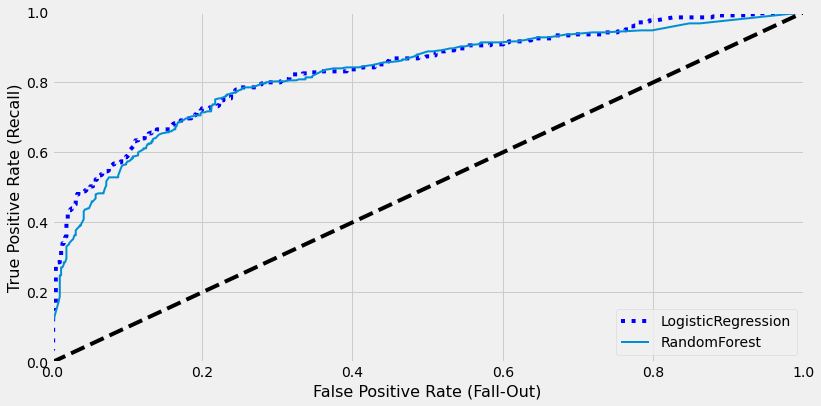

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(false_positive_rate, true_positive_rate, "b:", label="LogisticRegression")
plot_roc_curve(false_positive_rate_forest, true_positive_rate_forest, "RandomForest")
plt.legend(loc="lower right")
plt.show()

# 15. Oszacowanego modelu regresji logistycznej oraz lasu losowego proszę użyć do wygenerowania prognoz dla próby testowej. Proszę porównać jakość modeli w próbie testowej obliczając accuracy, sensitivity, specificity, AUCROC, F1 oraz rysując wykres krzywych ROC. Który model lepiej sprawdza się w prognozowaniu?

In [60]:
final_predictions_logreg = logistic_regression.predict(features_test_prepared)

In [61]:
final_predictions_forest = random_forest_classifier.predict(features_test_prepared)

In [62]:
accuracy_score(labels_test, final_predictions_logreg)

0.8091603053435115

In [63]:
accuracy_score(labels_test, final_predictions_forest)

0.7735368956743003

In [64]:
# sensitivity, also called recall
recall_score(labels_test, final_predictions_logreg)

0.72

In [65]:
recall_score(labels_test, final_predictions_forest)

0.7133333333333334

In [66]:
confusion_matrix_logreg = confusion_matrix(labels_test, final_predictions_logreg)
confusion_matrix_logreg

array([[210,  33],
       [ 42, 108]])

In [67]:
true_positive = confusion_matrix_logreg[1, 1]
true_negative = confusion_matrix_logreg[0, 0]
false_positive = confusion_matrix_logreg[0, 1]
false_negative = confusion_matrix_logreg[1, 0]

In [68]:
specificity = true_negative / (true_negative + false_positive)
specificity

0.8641975308641975

In [69]:
confusion_matrix_forest = confusion_matrix(labels_test, final_predictions_forest)
confusion_matrix_forest

array([[197,  46],
       [ 43, 107]])

In [70]:
true_positive = confusion_matrix_forest[1, 1]
true_negative = confusion_matrix_forest[0, 0]
false_positive = confusion_matrix_forest[0, 1]
false_negative = confusion_matrix_forest[1, 0]

In [71]:
specificity = true_negative / (true_negative + false_positive)
specificity

0.8106995884773662

In [72]:
# AUCROC
roc_auc_score(labels_test, final_predictions_logreg)

0.7920987654320988

In [73]:
roc_auc_score(labels_test, final_predictions_forest)

0.7620164609053498

In [74]:
# F1, harmonic mean of precision and recall
f1_score(labels_test, final_predictions_logreg)

0.7422680412371133

In [75]:
f1_score(labels_test, final_predictions_forest)

0.7062706270627063

In [76]:
scores = logistic_regression.decision_function(features_test_prepared)

false_positive_rate_logreg, true_positive_rate_logreg, threshold_logreg =  roc_curve(labels_test, scores)

In [77]:
labels_probas_forest = cross_val_predict(
    random_forest_classifier,
    features_test_prepared,
    labels_test,
    cv=10,
    method="predict_proba",
)

In [78]:
labels_scores_forest = labels_probas_forest[:, 1]  # score = probability of positive class
false_positive_rate_forest, true_positive_rate_forest, threshold_forest = roc_curve(
    labels_test, labels_scores_forest
)

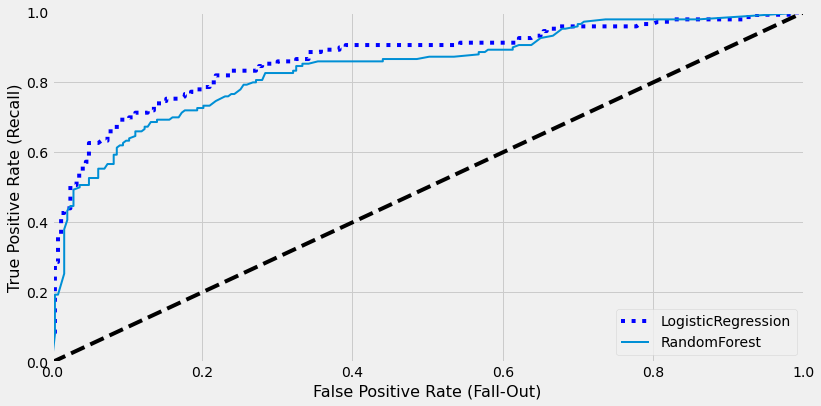

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(false_positive_rate_logreg, true_positive_rate_logreg, "b:", label="LogisticRegression")
plot_roc_curve(false_positive_rate_forest, true_positive_rate_forest, "RandomForest")
plt.legend(loc="lower right")
plt.show()

Ponadto, aby poprawić wynik mógłbym:

- Porównać więcej modeli i nastroić hiperparametry używając cross validation i grid search,
- Stworzyć nowe cechy np.:
    - podmienić sibsp i parch ich sumą
    - wychwycić nazwiska, które dobrze korelują z atrybutem survived (np. kiedy nazwisko zawiera "Countess", to przetrwanie wydaję się być bardziej prawdopodobne),
- Spróbować skonwertować numeryczne atrybuty do kategorialnych: poszczególne grupy wiekowe mają różne szanse na przeżycie (poniżej), mogłoby pomóc stworzenie kategori "koszyków" względem wieku i użycie jej zamiast zmiennej wiek. Podobnie, sprawdziłbym specjalną kategorię dla ludzi podróżujących samotnie, poieważ tylko 30% z nich przeżyło katastrofę (poniżej).

In [80]:
data["age_bucket"] = data["age"] // 15 * 15
data[["age_bucket", "survived"]].groupby(["age_bucket"]).mean()

,survived
age_bucket,
0.0,0.559633
15.0,0.373913
30.0,0.392027
45.0,0.470588
60.0,0.263158
75.0,1.000000


In [81]:
data["relatives_on_board"] = data["sibsp"] + data["parch"]
data[["relatives_on_board", "survived"]].groupby(["relatives_on_board"]).mean()

,survived
relatives_on_board,
0,0.302532
1,0.536170
2,0.566038
3,0.697674
4,0.272727
5,0.200000
6,0.250000
7,0.000000
10,0.000000
